In [2]:
import sys
import seaborn as sns
import os
import glob
from matplotlib import pyplot as plt
import numpy as np
import plot as pltfn
from sklearn.cluster import KMeans
import admin_functions as adfn
#plt.style.use('dark_background')
sns.reset_orig()
%load_ext autoreload
%autoreload

# Define paths
#---------------------------------------------------------------------------
Fdrop = '/Users/dominicburrows/Dropbox/PhD/analysis/'
Fmac = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'
Ftm = '/Volumes/Dominic Time Machine/'
experiment = 'PTZ-WILDTYPE'
savepath = Fdrop + 'Project/' + experiment + os.sep 

/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collectio

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import networkx as nx
from sklearn.metrics.pairwise import euclidean_distances
import copy

# Node coordinates
#---------------------------------------------------------------------------
os.chdir(Fdrop + 'Project/' + experiment)
node = sorted(glob.glob('knodes*'))
cyclist = sorted(glob.glob('netparam2*-cycles*'))

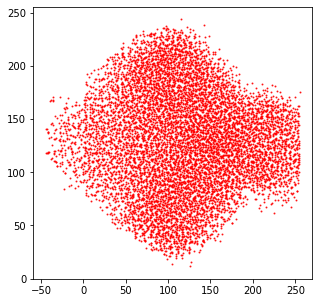

In [4]:
fig,axarr = plt.subplots(figsize = (5,5))
nodes = np.load(node[0])
axarr.scatter(nodes[:,0], nodes[:,1], s = 1, color = 'red' , alpha = 0.8)
plt.show()

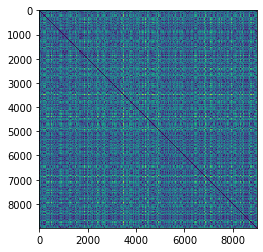

In [6]:
#K + P - LOG SCALE 
import numpy as np
import matplotlib.pyplot as plt
p_vals = adfn.repeat_list(0.5,10)
k_vals = []
for i in range(10):
    k_vals = np.append(k_vals, (i+1)/nodes.shape[0])

cell_locs = nodes
dist = euclidean_distances(nodes)
Nnodes = nodes.shape[0]
plt.imshow(dist)
plt.show()

In [7]:
p_vals

[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]

In [8]:
k_vals

array([0.00011123, 0.00022247, 0.0003337 , 0.00044494, 0.00055617,
       0.00066741, 0.00077864, 0.00088988, 0.00100111, 0.00111235])

In [9]:
savepath = Fdrop + 'Project/' + experiment + os.sep 

# Sweep through k and p
#----------------------------------------
from scipy import sparse
import scipy
import networkx as nx
for i in range(len(k_vals)):
    for e in range(len(p_vals)):
        output = watts_strogatz(Nnodes, dist, k_vals[i], p_vals[e])
        sparse_A = sparse.csr_matrix(output)
        scipy.sparse.save_npz(savepath + 'lowk-network-k' + str(k_vals[i]) + '-p' + str(p_vals[e]) + '-' + str(e+1), sparse_A)
        mat = output
        G = nx.from_numpy_matrix(mat)
        cyc = nx.algorithms.cycle_basis(G)
        edge =  G.number_of_edges() 
        cyc_vec = np.zeros(len(cyc))
        for t in range(len(cyc)):
            cyc_vec[t] = len(cyc[t])
        cyc_list = [np.unique(cyc_vec, return_counts=True),len(cyc),edge]
        np.save(savepath + 'lowk-network-k-' +  str(k_vals[i]) + '-p' + str(p_vals[e]) + '-' + str(e+1) + '-cycles.npy', cyc_list)
        print('Done #' + str(e) + 'of' + str(k_vals[i]))

Done #0of0.00011123470522803115
Done #1of0.00011123470522803115
Done #2of0.00011123470522803115
Done #3of0.00011123470522803115
Done #4of0.00011123470522803115
Done #5of0.00011123470522803115
Done #6of0.00011123470522803115
Done #7of0.00011123470522803115
Done #8of0.00011123470522803115
Done #9of0.00011123470522803115
Done #0of0.0002224694104560623
Done #1of0.0002224694104560623
Done #2of0.0002224694104560623
Done #3of0.0002224694104560623
Done #4of0.0002224694104560623
Done #5of0.0002224694104560623
Done #6of0.0002224694104560623
Done #7of0.0002224694104560623
Done #8of0.0002224694104560623
Done #9of0.0002224694104560623
Done #0of0.0003337041156840934
Done #1of0.0003337041156840934
Done #2of0.0003337041156840934
Done #3of0.0003337041156840934
Done #4of0.0003337041156840934
Done #5of0.0003337041156840934
Done #6of0.0003337041156840934
Done #7of0.0003337041156840934
Done #8of0.0003337041156840934
Done #9of0.0003337041156840934
Done #0of0.0004449388209121246
Done #1of0.000444938820912124

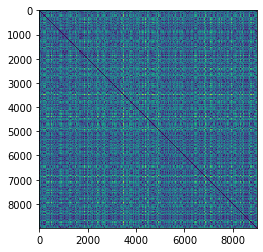

In [10]:
#K + P - LOG SCALE 
import numpy as np
import matplotlib.pyplot as plt
p_vals = adfn.repeat_list(0.6,10)
k_vals = []
for i in range(10):
    k_vals = np.append(k_vals, (i+1)/nodes.shape[0])

cell_locs = nodes
dist = euclidean_distances(nodes)
Nnodes = nodes.shape[0]
plt.imshow(dist)
plt.show()

In [11]:
savepath = Fdrop + 'Project/' + experiment + os.sep 

# Sweep through k and p
#----------------------------------------
from scipy import sparse
import scipy
import networkx as nx
for i in range(len(k_vals)):
    for e in range(len(p_vals)):
        output = watts_strogatz(Nnodes, dist, k_vals[i], p_vals[e])
        sparse_A = sparse.csr_matrix(output)
        scipy.sparse.save_npz(savepath + 'lowk-network-k' + str(k_vals[i]) + '-p' + str(p_vals[e]) + '-' + str(e+1), sparse_A)
        mat = output
        G = nx.from_numpy_matrix(mat)
        cyc = nx.algorithms.cycle_basis(G)
        edge =  G.number_of_edges() 
        cyc_vec = np.zeros(len(cyc))
        for t in range(len(cyc)):
            cyc_vec[t] = len(cyc[t])
        cyc_list = [np.unique(cyc_vec, return_counts=True),len(cyc),edge]
        np.save(savepath + 'lowk-network-k-' +  str(k_vals[i]) + '-p' + str(p_vals[e]) + '-' + str(e+1) + '-cycles.npy', cyc_list)
        print('Done #' + str(e) + 'of' + str(k_vals[i]))

Done #0of0.00011123470522803115
Done #1of0.00011123470522803115
Done #2of0.00011123470522803115
Done #3of0.00011123470522803115
Done #4of0.00011123470522803115
Done #5of0.00011123470522803115
Done #6of0.00011123470522803115
Done #7of0.00011123470522803115
Done #8of0.00011123470522803115
Done #9of0.00011123470522803115
Done #0of0.0002224694104560623
Done #1of0.0002224694104560623
Done #2of0.0002224694104560623
Done #3of0.0002224694104560623
Done #4of0.0002224694104560623
Done #5of0.0002224694104560623
Done #6of0.0002224694104560623
Done #7of0.0002224694104560623
Done #8of0.0002224694104560623
Done #9of0.0002224694104560623
Done #0of0.0003337041156840934
Done #1of0.0003337041156840934
Done #2of0.0003337041156840934
Done #3of0.0003337041156840934
Done #4of0.0003337041156840934
Done #5of0.0003337041156840934
Done #6of0.0003337041156840934
Done #7of0.0003337041156840934
Done #8of0.0003337041156840934
Done #9of0.0003337041156840934
Done #0of0.0004449388209121246
Done #1of0.000444938820912124

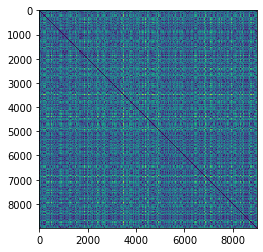

In [12]:
#K + P - LOG SCALE 
import numpy as np
import matplotlib.pyplot as plt
p_vals = adfn.repeat_list(0.7,10)
k_vals = []
for i in range(10):
    k_vals = np.append(k_vals, (i+1)/nodes.shape[0])

cell_locs = nodes
dist = euclidean_distances(nodes)
Nnodes = nodes.shape[0]
plt.imshow(dist)
plt.show()

In [13]:
savepath = Fdrop + 'Project/' + experiment + os.sep 

# Sweep through k and p
#----------------------------------------
from scipy import sparse
import scipy
import networkx as nx
for i in range(len(k_vals)):
    for e in range(len(p_vals)):
        output = watts_strogatz(Nnodes, dist, k_vals[i], p_vals[e])
        sparse_A = sparse.csr_matrix(output)
        scipy.sparse.save_npz(savepath + 'lowk-network-k' + str(k_vals[i]) + '-p' + str(p_vals[e]) + '-' + str(e+1), sparse_A)
        mat = output
        G = nx.from_numpy_matrix(mat)
        cyc = nx.algorithms.cycle_basis(G)
        edge =  G.number_of_edges() 
        cyc_vec = np.zeros(len(cyc))
        for t in range(len(cyc)):
            cyc_vec[t] = len(cyc[t])
        cyc_list = [np.unique(cyc_vec, return_counts=True),len(cyc),edge]
        np.save(savepath + 'lowk-network-k-' +  str(k_vals[i]) + '-p' + str(p_vals[e]) + '-' + str(e+1) + '-cycles.npy', cyc_list)
        print('Done #' + str(e) + 'of' + str(k_vals[i]))

Done #0of0.00011123470522803115
Done #1of0.00011123470522803115
Done #2of0.00011123470522803115
Done #3of0.00011123470522803115
Done #4of0.00011123470522803115
Done #5of0.00011123470522803115
Done #6of0.00011123470522803115
Done #7of0.00011123470522803115
Done #8of0.00011123470522803115
Done #9of0.00011123470522803115
Done #0of0.0002224694104560623
Done #1of0.0002224694104560623
Done #2of0.0002224694104560623
Done #3of0.0002224694104560623
Done #4of0.0002224694104560623
Done #5of0.0002224694104560623
Done #6of0.0002224694104560623
Done #7of0.0002224694104560623
Done #8of0.0002224694104560623
Done #9of0.0002224694104560623
Done #0of0.0003337041156840934
Done #1of0.0003337041156840934
Done #2of0.0003337041156840934
Done #3of0.0003337041156840934
Done #4of0.0003337041156840934
Done #5of0.0003337041156840934
Done #6of0.0003337041156840934
Done #7of0.0003337041156840934
Done #8of0.0003337041156840934
Done #9of0.0003337041156840934
Done #0of0.0004449388209121246
Done #1of0.000444938820912124

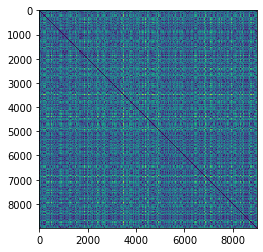

In [14]:
#K + P - LOG SCALE 
import numpy as np
import matplotlib.pyplot as plt
p_vals = adfn.repeat_list(0.8,10)
k_vals = []
for i in range(10):
    k_vals = np.append(k_vals, (i+1)/nodes.shape[0])

cell_locs = nodes
dist = euclidean_distances(nodes)
Nnodes = nodes.shape[0]
plt.imshow(dist)
plt.show()

In [15]:
savepath = Fdrop + 'Project/' + experiment + os.sep 

# Sweep through k and p
#----------------------------------------
from scipy import sparse
import scipy
import networkx as nx
for i in range(len(k_vals)):
    for e in range(len(p_vals)):
        output = watts_strogatz(Nnodes, dist, k_vals[i], p_vals[e])
        sparse_A = sparse.csr_matrix(output)
        scipy.sparse.save_npz(savepath + 'lowk-network-k' + str(k_vals[i]) + '-p' + str(p_vals[e]) + '-' + str(e+1), sparse_A)
        mat = output
        G = nx.from_numpy_matrix(mat)
        cyc = nx.algorithms.cycle_basis(G)
        edge =  G.number_of_edges() 
        cyc_vec = np.zeros(len(cyc))
        for t in range(len(cyc)):
            cyc_vec[t] = len(cyc[t])
        cyc_list = [np.unique(cyc_vec, return_counts=True),len(cyc),edge]
        np.save(savepath + 'lowk-network-k-' +  str(k_vals[i]) + '-p' + str(p_vals[e]) + '-' + str(e+1) + '-cycles.npy', cyc_list)
        print('Done #' + str(e) + 'of' + str(k_vals[i]))

Done #0of0.00011123470522803115
Done #1of0.00011123470522803115
Done #2of0.00011123470522803115
Done #3of0.00011123470522803115
Done #4of0.00011123470522803115
Done #5of0.00011123470522803115
Done #6of0.00011123470522803115
Done #7of0.00011123470522803115
Done #8of0.00011123470522803115
Done #9of0.00011123470522803115
Done #0of0.0002224694104560623
Done #1of0.0002224694104560623
Done #2of0.0002224694104560623
Done #3of0.0002224694104560623
Done #4of0.0002224694104560623
Done #5of0.0002224694104560623
Done #6of0.0002224694104560623
Done #7of0.0002224694104560623
Done #8of0.0002224694104560623
Done #9of0.0002224694104560623
Done #0of0.0003337041156840934
Done #1of0.0003337041156840934
Done #2of0.0003337041156840934
Done #3of0.0003337041156840934
Done #4of0.0003337041156840934
Done #5of0.0003337041156840934
Done #6of0.0003337041156840934
Done #7of0.0003337041156840934
Done #8of0.0003337041156840934
Done #9of0.0003337041156840934
Done #0of0.0004449388209121246
Done #1of0.000444938820912124

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import networkx as nx
from sklearn.metrics.pairwise import euclidean_distances
import copy
import random

#===============================================================================
def watts_strogatz(Nnodes, dist, edge_density, p): #Generate random small world graph with specific Edge density 
#===============================================================================
# Here I'm choosing the Watts-Strogatz model that has (i) a small average 
# shortest path length, and (ii) a large clustering coefficient
    
    k_neighbours  = int(Nnodes * edge_density)
    A  = np.zeros(dist.shape)

    if k_neighbours == 0: 
        return A
    
    # Loop through rows of distance matrix to find k_neighbours
    #-----------------------------------------------------------------------------
    for row in range(dist.shape[0]):
        neighbours = dist[row,].argsort()[:k_neighbours+1][::-1] # find neighbours 
        A[row,neighbours[:-1]] = 1                               # make all edges of neighbours connected in network
        A[neighbours[:-1],row] = 1                               # make connections symmetrical 

    # Rewire connections with certain probability
    #-----------------------------------------------------------------------------
    [rows, cols]    = np.where(np.triu(A) == 1) 
    probs           = np.random.uniform(size = rows.shape[0])    # Generate random values for each connection 
    edges_to_change = np.where(probs <= p)[0]                    # see which values are randomly changed
    old_A  = copy.deepcopy(A)                                    # create copy of A

    for e in range(edges_to_change.shape[0]):                    # Loop through edges to change
        this_edge = edges_to_change[e]
        A[rows[this_edge], cols[this_edge]] = 0                  # switch off old edge
        A[cols[this_edge], rows[this_edge]] = 0

        where_0  = np.where(A[rows[this_edge]] == 0)[0]          # find possible connections to reassign to 
        new_edge = random.choice(where_0[np.where(where_0 !=rows[this_edge])[0]]) #randomly choose one - ignoring any connections on the diagonal 
        
        A[rows[this_edge], new_edge] = 1                         # Assign new edge
        A[new_edge, rows[this_edge]] = 1  
    
    return A